In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
names=['ID number','Diagnosis','mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry', 'mean fractal dimension',
       'se radius','se texture','se perimeter','se area','se smoothness','se compactness','se concavity','se concave points','se symmetry', 'se fractal dimension',
      'worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry', 'worst fractal dimension']
w=pd.read_csv('/Users/phuongqn/Desktop/INF552/Homework/Homework 6 Data/wdbc.data', names = names)
mapping = {'M': 1, 'B': 0}
w['Diagnosis'] = w['Diagnosis'].replace('M', 1)
w['Diagnosis'] = w['Diagnosis'].replace('B', 0)
w

,ID number,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
m_set=w[w['Diagnosis']==1]
b_set=w[w['Diagnosis'] == 0]
m_set_targ= m_set.pop('Diagnosis')
b_set_targ= b_set.pop('Diagnosis')
m_set_pred= m_set.drop(columns=['ID number'])
b_set_pred= b_set.drop(columns=['ID number'])

In [18]:
m_set_targ

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
      ..
444    1
446    1
449    1
451    1
460    1
461    1
468    1
479    1
487    1
489    1
492    1
498    1
499    1
501    1
503    1
509    1
512    1
514    1
516    1
517    1
521    1
533    1
535    1
536    1
562    1
563    1
564    1
565    1
566    1
567    1
Name: Diagnosis, Length: 212, dtype: int64

In [9]:
m_Xtrain, m_Xtest, m_ytrain, m_ytest= train_test_split( m_set_pred, m_set_targ, shuffle=True, test_size=0.2)
b_Xtrain, b_Xtest, b_ytrain, b_ytest= train_test_split( b_set_pred, b_set_targ, shuffle=True, test_size=0.2)

In [10]:
M=30
X_train=pd.concat([m_Xtrain,b_Xtrain], ignore_index=True)
X_test=pd.concat([m_Xtest,b_Xtest], ignore_index=True)
y_train=pd.concat([m_ytrain,b_ytrain], ignore_index=True)
y_test=pd.concat([m_ytest,b_ytest], ignore_index=True)

In [11]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_n = normalizer.fit_transform(X_train)
X_test_n = normalizer.transform(X_test)

In [12]:
from sklearn.preprocessing import Normalizer
M=30
def report(true_y, pred_y):
    accuracy=accuracy_score(true_y, pred_y)
    precision=precision_score(true_y, pred_y, pos_label=1)
    recall=recall_score(true_y, pred_y,pos_label=1)
    f1=f1_score(true_y, pred_y,pos_label=1)
    fpr, tpr, thresholds = metrics.roc_curve(true_y, pred_y, pos_label=1)
    auc= metrics.auc(fpr, tpr)
    return [accuracy,precision,recall,f1,auc]

def draw_roc(true_y, pred_y):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, pred_y, pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
def cfs_matrix(true_y, pred_y):
    cfs_m=confusion_matrix(true_y, pred_y)
    return cfs_m

In [14]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC
Cs = [1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]
def optimal_c(trainX, ytrain):
    s_scores = {}
    for i in Cs:
        svm_m = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=i)
        svm_score = cross_val_score(svm_m, trainX, ytrain, cv=5, scoring= 'accuracy')
        s_scores[i] = np.mean(svm_score)
    opt_c = min(s_scores,key=s_scores.get)
    
    return opt_c

Training Confusion Matrix:
[[283   2]
 [ 74  95]]
ROC train curve:


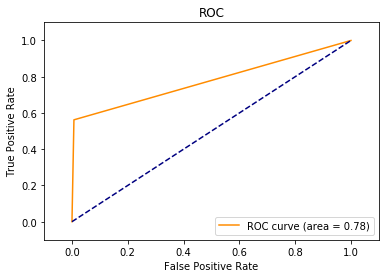

Testing Confusion Matrix:
[[72  0]
 [15 28]]
ROC train curve:


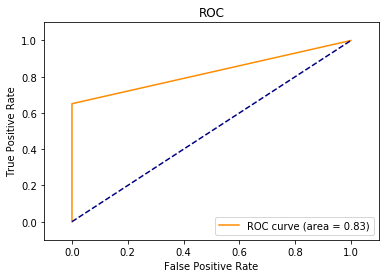

,Accuracy,Precision,Recall,f1-score,AUC
Training Set,0.842584,0.981877,0.587968,0.735348,0.790768
Test Set,0.83942,0.987181,0.578295,0.725975,0.786832


In [16]:
from sklearn.calibration import CalibratedClassifierCV
mc_train=[]
mc_test=[]
for i in range (M):
    m_Xtrain, m_Xtest, m_ytrain, m_ytest= train_test_split( m_set_pred, m_set_targ, shuffle=True, test_size=0.2)
    b_Xtrain, b_Xtest, b_ytrain, b_ytest= train_test_split( b_set_pred, b_set_targ, shuffle=True, test_size=0.2)
    X_train=pd.concat([m_Xtrain,b_Xtrain], ignore_index=True)
    X_test=pd.concat([m_Xtest,b_Xtest], ignore_index=True)
    y_train=pd.concat([m_ytrain,b_ytrain], ignore_index=True)
    y_test=pd.concat([m_ytest,b_ytest], ignore_index=True)
    normalizer = Normalizer()
    X_train_n = normalizer.fit_transform(X_train)
    X_test_n = normalizer.transform(X_test)
    
    opt_c=optimal_c(X_train_n, y_train)
    s_m = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_c)
    clf=s_m.fit(X_train_n,y_train)
 
    train_pred = clf.predict(X_train_n)
    test_pred = clf.predict(X_test_n)

    mc_train.append(report(y_train, train_pred))
    mc_test.append(report(y_test, test_pred))

    if i==1:
        print('Training Confusion Matrix:')
        print(cfs_matrix(y_train, train_pred))
        print('ROC train curve:')
        draw_roc(y_train, train_pred)
        print('Testing Confusion Matrix:')
        print(cfs_matrix(y_test, test_pred))
        print('ROC train curve:')
        draw_roc(y_test, test_pred)
        
avg=pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC'])
MCtrain = np.array(mc_train).mean(axis=0).tolist()
MCtest = np.array(mc_test).mean(axis=0).tolist()   
    
avg.loc['Training Set',:] = MCtrain
avg.loc['Test Set',:] = MCtest
avg

In [17]:
newX=X_train.copy()
newX['class']=y_train
b_cl=newX[newX['class']==0]
m_cl=newX[newX['class']==1]

In [18]:
m_X_l, m_X_u, m_y_l, m_y_u = train_test_split(m_cl.drop(['class'], axis=1), m_cl['class'], test_size = 0.5,random_state=True)
b_X_l, b_X_u, b_y_l, b_y_u = train_test_split(b_cl.drop(['class'], axis=1), b_cl['class'], test_size = 0.5,random_state=True)

In [31]:
X_label = pd.concat([m_X_l, b_X_l])
y_label = pd.concat([m_y_l, b_y_l])
X_unlabel = pd.concat([m_X_u, b_X_u])
y_unlabel = pd.concat([m_y_u, b_y_u])
X_l_n = normalizer.fit_transform(X_label)
X_u_n = normalizer.transform(X_unlabel)

In [32]:
s_mc_train=[]
s_mc_test=[]
for i in range (M):
    opt_c = optimal_c(X_label, y_label)
    semi_model = svm.LinearSVC(penalty='l1', dual=False, tol=0.0001, C=opt_c)
    semi_model.fit(X_l_n,y_label)
    while len(X_unlabel)!=0:
        distances = semi_model.decision_function(X_unlabel)
        keys=np.arange(len(X_unlabel))
        dictionary = dict(zip(keys, distances))
        index = max(dictionary,key=dictionary.get)
        predict_x=X_u_n[index].reshape(1,-1)
        u_train_pred=semi_model.predict(predict_x)
        X_l_n=np.append(X_l_n, X_u_n[index],axis=0)
        y_label=np.append(y_label,u_train_pred,axis=0)
        X_u_n=np.delete(X_u_n,far_dist, 0)
        semi_clf = svm_l1_ss_model.fit(x_train_new,y_train_new)
    semi_clf = semi_model.fit(x_train_new,y_train_new)
    model = CalibratedClassifierCV(semi_clf,method='sigmoid')
    model.fit(x_train_new,y_train_new)
    train_ss_pred = model.predict(x_train_new)
    test_ss_pred = model.predict(x_test_norm)
    train_ss_prob = model.predict_proba(x_train_new)
    test_ss_prob = model.predict_proba(x_test_norm)
    
    s_mc_train.append(report(y_train, s_train_pred))
    s_mc_test.append(report(y_test, s_test_pred))
    
    if i==1:
        print('Training Confusion Matrix:')
        print(cfs_matrix(y_label, s_train_pred))
        print('ROC train curve:')
        draw_roc(y_label, s_train_pred)
        print('Testing Confusion Matrix:')
        print(cfs_matrix(y_unlabel, s_test_pred))
        print('ROC train curve:')
        draw_roc(y_unlabel, s_test_pred)
        
avg_semi=pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC'])
s_MCtrain = np.array(s_mc_train).mean(axis=0).tolist()
s_MCtest = np.array(s_mc_test).mean(axis=0).tolist()   
    
avg_semi.loc['Training Set',:] = s_MCtrain
avg_semi.loc['Test Set',:] = s_MCtest
avg_semi

ValueError: all the input arrays must have same number of dimensions

In [ ]:
from scipy.spatial import distance